In [1]:
from sklearn.datasets import make_blobs

In [9]:
X, y = make_blobs(200, 3, centers=3, cluster_std=0.6, random_state=0)

In [10]:
import pandas as pd
df = pd.DataFrame(X, columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,0.579608,3.595673,2.173853
1,1.488134,-2.222428,2.655960
2,-1.005970,7.211443,10.025286
3,0.062948,-1.505148,2.429239
4,0.225738,4.858938,1.512396


## K-Means

In [11]:
from sklearn.cluster import KMeans

In [15]:
inertias = [0, 0]

In [14]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(n_clusters=2)

In [16]:
inertias.append(kmeans.inertia_)

In [17]:
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
inertias.append(kmeans.inertia_)

In [18]:
inertias

[0, 0, 1463.1655117123723, 203.29085284324532]

In [31]:
inertias = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
inertias

[2541.4959080352437,
 203.29085284324532,
 183.9898653080847,
 173.67953508176026,
 161.8978070771322,
 150.14129591764691,
 124.40357793077149,
 117.26784243326318]

In [26]:
import matplotlib.pyplot as plt
import numpy as np

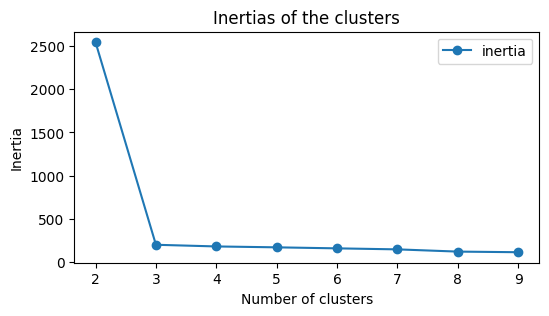

In [36]:
plt.figure(figsize=(6, 3))
plt.plot(range(2, 10), inertias, marker='o', label='inertia')
plt.title('Inertias of the clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()

In [34]:
from sklearn.metrics import silhouette_score

sil_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    sil_scores.append(
        silhouette_score(X, kmeans.labels_)
    )

sil_scores

[0.6962222601311916,
 0.804222021292156,
 0.6212719953598227,
 0.425372544459259,
 0.42694324012165735,
 0.2492419650658271,
 0.24623968746626396,
 0.2588729712190724]

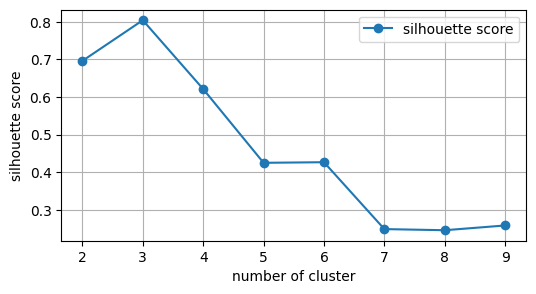

In [37]:
plt.figure(figsize=(6, 3))
plt.plot(range(2, 10), sil_scores, marker='o', label='silhouette score')
plt.legend()
plt.xlabel('number of cluster')
plt.ylabel('silhouette score')
plt.grid()

In [38]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0,
       2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0,
       1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0,
       2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 1])

In [39]:
df['labels'] = kmeans.labels_

In [40]:
df

,a,b,c,labels
0,0.579608,3.595673,2.173853,1
1,1.488134,-2.222428,2.655960,2
2,-1.005970,7.211443,10.025286,0
3,0.062948,-1.505148,2.429239,2
4,0.225738,4.858938,1.512396,1
...,...,...,...,...
195,-1.712408,7.417851,9.025841,0
196,-1.489591,6.915651,10.201003,0
197,0.758952,-2.493050,3.776243,2
198,0.827119,-1.303032,2.686265,2
